In [6]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [25]:
# Size of image
size = 513

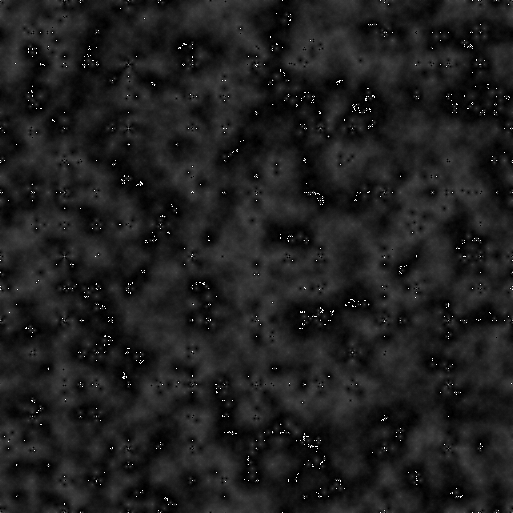

In [29]:
# Blank image
canvas = np.zeros((size, size, 1), np.uint8)

# Set Corners to same random value
rand = np.random.randint(0, 256)
canvas[0][0] = rand
canvas[0][size-1] = rand
canvas[size-1][0] = rand
canvas[size-1][size-1] = rand

# Set the randomness bounds, higher values mean rougher landscapes
randomness = 512
tile = size-1

while tile > 1:
    half = tile // 2

    # Set the centers
    for x in range(0, size-1, tile):
        for y in range(0, size-1, tile):
            corner_sum = canvas[x][y] + \
                         canvas[x + tile][y] + \
                         canvas[x][y + tile] + \
                         canvas[x + tile][y + tile]

            avg = corner_sum / 4
            avg = avg + np.random.randint(-randomness, randomness)

            canvas[x + half][y + half] = avg

    # Set the corners
    for x in range(0, size-1, half):
        for y in range((x + half) % tile, size-1, tile):
            avg = canvas[(x-half+size-1) % (size-1)][y] + \
                  canvas[(x+half) % (size-1)][y] + \
                  canvas[x][(y+half) % (size-1)] + \
                  canvas[x][(y-half+size-1) % (size-1)]

            avg = int(avg/4)
            avg = avg + np.random.randint(-randomness, randomness)

            canvas[x][y] = avg

            # because the values wrap round, the left and right edges are equal, same with top and bottom
            if x == 0:
                canvas[size - 1][y] = avg
            if y == 0:
                canvas[x][size - 1] = avg

    randomness = max(randomness // 2, 1)
    tile //= 2

cv2_imshow(canvas)

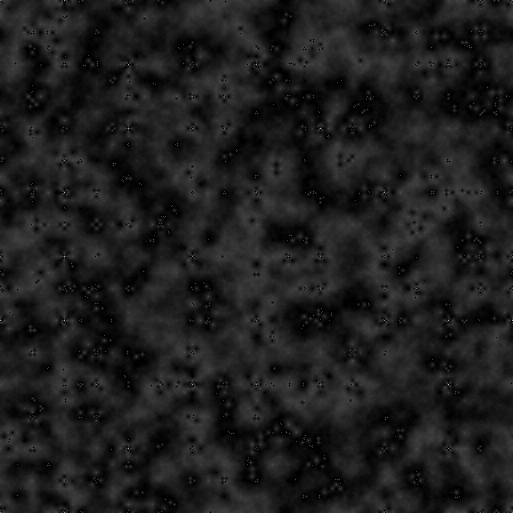

In [31]:
test = np.where(canvas >= 200, 0, canvas)

cv2_imshow(test)